<a href="https://colab.research.google.com/github/Arunav07/CRISTL-Project-1/blob/Atharva_M/tf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf

In [24]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
from google.colab import drive
drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
                                       ###########                         for one .xml file                               ############

import xml.etree.ElementTree as ET
import csv
import pandas as pd


f = open('/content/gdrive/My Drive/IDD_Detection/Annotations/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000006_r.xml') 
root = ET.parse(f)

# Create and open csv
xml_data_to_csv = open('Out.csv','w')

# Create the variable to write the csv
csv_writer = csv.writer(xml_data_to_csv)

# creating the columns for the table
Table = []
Table.append([('Labels'),('Co-ordinates')])
for obj in root.findall('object'):
    bndbox: ET.Element = obj.find('bndbox')
    name = obj.find('name').text
    xmin, xmax, ymin, ymax = [int(bndbox.find(x).text) for x in ['xmin', 'xmax', 'ymin', 'ymax']]
    coords = [(x, y) for x in [xmin, xmax] for y in [ymin, ymax]]
    Table.append([(name),(coords)])

# adding too csv
csv_writer.writerows(Table)

# close the csv file
xml_data_to_csv.close()      
  
# close the .xml file
f.close()

In [27]:
 #############                for entire batch - Frontfar            ###################
import xml.etree.ElementTree as ET
import csv
import pandas as pd
import os
from PIL import Image

count = 0
for i in range(6,17400,6):
  try:
    count += 1
    annot_path = '/content/gdrive/My Drive/IDD_Detection/Annotations/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/'
    path_name = annot_path + str(i).zfill(6) + "_r.xml"
    f = open(path_name) 
    root = ET.parse(f)

    # Create and open csv
    xml_data_to_csv = open('Out.csv','a')

    # Create the variable to wrtie the csv
    csv_writer = csv.writer(xml_data_to_csv)

    # creating the columns for the table
    Table = []

    for obj in root.findall('object'):
        bndbox: ET.Element = obj.find('bndbox')
        name = obj.find('name').text
        xmin, xmax, ymin, ymax = [int(bndbox.find(x).text) for x in ['xmin', 'xmax', 'ymin', 'ymax']]
        coords = [(x, y) for x in [xmin, xmax] for y in [ymin, ymax]]
        Table.append([(name),(coords)])

    # adding too csv
    csv_writer.writerows(Table)

    # close the csv file
    xml_data_to_csv.close()      
  
    # close the .xml file
    f.close()
  except FileNotFoundError:
    continue

In [28]:
with open("/content/Out.csv",newline='') as csvfile:
    df_labels = pd.read_csv(csvfile)

df_labels = df_labels['Labels'].values

print(df_labels)

['truck' 'person' 'autorickshaw' ... 'rider' 'vehicle fallback' 'rider']


In [29]:
main_list = ['motorcycle','rider' ,'person', 'bus', 'traffic sign', 'truck', 'bicycle', 'car', 'autorickshaw', 'vehicle fallback', 'animal']
char_to_int = dict((j, i) for i, j in enumerate(main_list)) 
#print(char_to_int)
#int_to_char = dict((i, j) for i, j in enumerate(poss)) 
integer_encoded = [char_to_int[i] for i in df_labels] 
print(integer_encoded)

[5, 2, 8, 2, 7, 5, 2, 8, 2, 7, 5, 5, 8, 2, 2, 5, 5, 5, 5, 8, 5, 8, 5, 5, 5, 5, 5, 2, 8, 5, 5, 8, 2, 5, 5, 8, 2, 0, 1, 8, 5, 2, 2, 2, 2, 0, 1, 5, 8, 2, 0, 1, 5, 2, 2, 2, 0, 1, 0, 1, 3, 3, 8, 7, 3, 6, 1, 8, 3, 6, 1, 9, 8, 9, 3, 8, 9, 6, 1, 8, 9, 6, 1, 9, 0, 1, 6, 1, 8, 0, 1, 9, 0, 9, 6, 1, 0, 1, 1, 8, 9, 0, 1, 6, 1, 9, 0, 1, 1, 0, 1, 0, 1, 6, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 8, 6, 1, 9, 8, 2, 0, 1, 0, 1, 1, 2, 9, 7, 2, 9, 2, 7, 0, 0, 6, 1, 1, 6, 1, 1, 7, 0, 1, 6, 1, 6, 1, 7, 0, 1, 5, 7, 7, 6, 1, 0, 1, 5, 7, 6, 1, 0, 1, 7, 5, 7, 0, 1, 7, 5, 4, 4, 0, 1, 7, 4, 0, 1, 4, 0, 1, 0, 1, 3, 3, 2, 0, 1, 0, 1, 7, 8, 0, 1, 0, 1, 8, 7, 0, 1, 8, 7, 0, 1, 8, 6, 1, 7, 0, 1, 8, 0, 0, 1, 1, 7, 8, 0, 1, 0, 1, 7, 8, 0, 1, 7, 8, 0, 1, 7, 8, 7, 0, 1, 7, 0, 1, 5, 8, 7, 0, 1, 8, 7, 7, 0, 1, 8, 5, 0, 7, 7, 1, 1, 7, 7, 5, 7, 0, 1, 1, 5, 5, 0, 5, 1, 7, 0, 0, 1, 1, 8, 7, 7, 7, 3, 0, 1, 1, 8, 7, 7, 7, 0, 1, 1, 0, 1, 1, 3, 8, 7, 7, 7, 0, 1, 1, 9, 7, 7, 7, 7, 0, 1, 1, 9, 7, 0, 1, 0, 1, 1, 8, 7, 9, 0, 1, 1, 9, 8, 7, 

In [30]:
onehot_encoded = list() 
for i in integer_encoded: 
    t=[0 for j in range(len(main_list))] 
    t[i]=1 
    onehot_encoded.append(t) 


print(onehot_encoded) 
#inverted = int_to_char[argmax(onehot_encoded[0])] 
#print(inverted) 

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

In [32]:
onehot_encoded = np.asarray(onehot_encoded)

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((onehot_encoded))

In [34]:
for item in dataset:
  print(dataset)

<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSliceDataset shapes: (11,), types: tf.int64>
<TensorSlice

In [35]:
dataset = tf.data.experimental.make_csv_dataset(
    "Out.csv",
    batch_size = 7,
    field_delim = ',',
    select_columns = ['Labels', 'Co-ordinates'],
    label_name= 'Labels'
)

In [36]:
for item in dataset.take(3):
  print(item)

(OrderedDict([('Co-ordinates', <tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'[(637, 463), (637, 597), (784, 463), (784, 597)]',
       b'[(529, 396), (529, 426), (554, 396), (554, 426)]',
       b'[(756, 437), (756, 504), (801, 437), (801, 504)]',
       b'[(568, 420), (568, 449), (588, 420), (588, 449)]',
       b'[(544, 404), (544, 454), (579, 404), (579, 454)]',
       b'[(451, 403), (451, 429), (473, 403), (473, 429)]',
       b'[(642, 402), (642, 421), (654, 402), (654, 421)]'], dtype=object)>)]), <tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'car', b'autorickshaw', b'rider', b'rider', b'autorickshaw',
       b'autorickshaw', b'rider'], dtype=object)>)
(OrderedDict([('Co-ordinates', <tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'[(580, 423), (580, 435), (586, 423), (586, 435)]',
       b'[(587, 385), (587, 409), (600, 385), (600, 409)]',
       b'[(545, 406), (545, 452), (564, 406), (564, 452)]',
       b'[(717, 398), (717, 435), (747, 398), (747, 435)]',
   

In [37]:
print(dataset)

<PrefetchDataset shapes: (OrderedDict([(Co-ordinates, (7,))]), (7,)), types: (OrderedDict([(Co-ordinates, tf.string)]), tf.string)>


In [38]:
data = pd.read_csv('Out.csv')
print(data)

                Labels                                       Co-ordinates
0                truck     [(26, 293), (26, 604), (396, 293), (396, 604)]
1               person   [(708, 439), (708, 480), (754, 439), (754, 480)]
2         autorickshaw  [(999, 414), (999, 541), (1132, 414), (1132, 5...
3               person  [(1177, 419), (1177, 557), (1227, 419), (1227,...
4                  car  [(131, 468), (131, 963), (1277, 468), (1277, 9...
...                ...                                                ...
1057        motorcycle   [(105, 387), (105, 470), (164, 387), (164, 470)]
1058             rider   [(113, 369), (113, 402), (143, 369), (143, 402)]
1059             rider   [(106, 371), (106, 454), (160, 371), (160, 454)]
1060  vehicle fallback         [(5, 428), (5, 522), (40, 428), (40, 522)]
1061             rider         [(0, 388), (0, 471), (30, 388), (30, 471)]

[1062 rows x 2 columns]


In [39]:
for item in dataset.take(1):
  print(item)

(OrderedDict([('Co-ordinates', <tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'[(489, 448), (489, 489), (516, 448), (516, 489)]',
       b'[(696, 411), (696, 431), (705, 411), (705, 431)]',
       b'[(629, 397), (629, 429), (642, 397), (642, 429)]',
       b'[(398, 529), (398, 582), (419, 529), (419, 582)]',
       b'[(604, 418), (604, 433), (613, 418), (613, 433)]',
       b'[(574, 413), (574, 432), (587, 413), (587, 432)]',
       b'[(567, 435), (567, 464), (591, 435), (591, 464)]'], dtype=object)>)]), <tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'rider', b'vehicle fallback', b'rider', b'person', b'rider',
       b'rider', b'bus'], dtype=object)>)


In [40]:
dataset = dataset.shuffle(10000).batch(7, drop_remainder = True)

In [41]:
print(dataset)

<BatchDataset shapes: (OrderedDict([(Co-ordinates, (7, 7))]), (7, 7)), types: (OrderedDict([(Co-ordinates, tf.string)]), tf.string)>


In [42]:
from google.colab import drive
drive.mount("/content/gdrive")
import numpy as np
import pandas as pd
import tensorflow as tf


from PIL import Image
import glob
import natsort

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
Images = glob.glob("/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/*.jpg")

In [44]:
Images = natsort.natsorted(Images,reverse=False)


In [45]:
#To check whether all images are read successfully or not.
print(Images)
print(type(Images))
print(len(Images))

['/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000006_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000054_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/0000060.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000060_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000066_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000072_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000078_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000084_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000090_r.jpg', '/content/

In [46]:
import matplotlib.pyplot as plt

(820, 1088, 1)


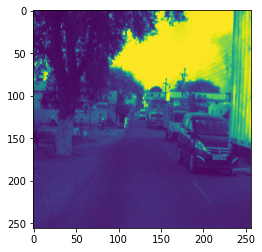

In [47]:
im = tf.io.read_file(Images[384])# Read the image
im_decoded = tf.io.decode_jpeg(im) # Decode the image
img=tf.image.rgb_to_grayscale(im_decoded)
img = tf.image.central_crop(img, 0.85)
print(img.shape)
#img = tf.image.crop_to_bounding_box(img, offset_height = 0 , offset_width = 0 , target_height = 2422, target_width = 3380)
img = tf.image.resize(img, size=(256, 256))
img = np.asarray(img)
plt.imshow(np.squeeze(img))
#plt.imshow(img,cmap='gray')
plt.show()